# __Using data to shop the best lingerie__

In this notebook I will be doing an exploratory analysis on a dataset that contains part of the June-July 2017 lingerie data from popular retailers such as: Amazon, American Eagle, b.tempt'd, Calvin Klein, Hanky Panky , Macy's, Nordstrom and Topshop USA.


The focus on this notebook will be:
- Analysis on the general quality of the brand measured by the ratings of their products.
- Analysis of quality, price and discounts in other to find the lingerie with a good relationship quality price.
- Analysis of the difference in price depending on the brand and retailer.






__NOTE:__ This project was done as part of the [Jovian.ml](https://jovian.ml) Zero to Pandas [course](http://zerotopandas.com). This notebook was tested on a Colab instance.



### __Jovian Commit info__

Jovian-Colab integration is used to keep version controlling on this project, the next cells are required to make commits. 

In [155]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.utils.colab.set_colab_file_id('1v0PiRlSXYTrNrHQcuHEQ41drvAptp_ug')

In [2]:
project_name = "zerotopandas-course-project" # change this

In [156]:
!pip install jovian --upgrade -q

In [157]:
import jovian

In [158]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/mvortizr/zerotopandas-course-project


'https://jovian.ml/mvortizr/zerotopandas-course-project'

### __Installing libraries__

For this project I will be using numpy, pandas, matplotlib and seaborn to make inferences and visualizations. 

The following cell installs all of those libraries into the environment. 

In [6]:
#Install libraries
!pip install jupyter numpy pandas matplotlib seaborn --upgrade


Requirement already up-to-date: jupyter in /usr/local/lib/python3.6/dist-packages (1.0.0)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.19.2)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.3)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.2)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)


### __Getting the data__

The source of this dataset is [Kaggle](https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others) but I uploaded a copy into my Github. We will download the raw zip file from my repo into the environment on a file called `data.zip`.

In [7]:
import requests 

url="https://github.com/mvortizr/EDA_projects/blob/master/Lingerie%20Data/lingerie_dataset.zip?raw=true"

response = requests.get(url, stream = True)


text_file = open("data.zip","wb")

for chunk in response.iter_content(chunk_size=1024):
    text_file.write(chunk)

text_file.close()

We will Linux's use unzip package to unzip the `data.zip` file into a new folder `./datasets`

In [8]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [9]:
!unzip data.zip -d datasets

Archive:  data.zip
replace datasets/ae_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/ae_com.csv     
replace datasets/amazon_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/amazon_com.csv  
replace datasets/btemptd_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/btemptd_com.csv  
replace datasets/calvinklein_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/calvinklein_com.csv  
replace datasets/hankypanky_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/hankypanky_com.csv  
replace datasets/macys_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/macys_com.csv  
replace datasets/shop_nordstrom_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/shop_nordstrom_com.csv  
replace datasets/us_topshop_com.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/us_topshop_com.csv  
replace datasets/victoriassecret_com.csv? [y]es,

## __Data Preparation and Cleaning__


I will be using pandas to manage the info inside those `.csv` files

In [10]:
import pandas as pd

### __Creating the initial dataframes__

I will load all the `.csv` files on different dataframes, each dataframe belongs to a different retailer.


In [11]:
american_eagle_df = pd.read_csv('./datasets/ae_com.csv')
amazon_df = pd.read_csv('./datasets/amazon_com.csv')
btemptd_df = pd.read_csv('./datasets/btemptd_com.csv')
calvin_klein_df = pd.read_csv('./datasets/calvinklein_com.csv')
hanky_panky_df = pd.read_csv('./datasets/hankypanky_com.csv')
macys_df = pd.read_csv('./datasets/macys_com.csv')
nordstrom_df = pd.read_csv('./datasets/shop_nordstrom_com.csv')
topshop_df = pd.read_csv('./datasets/us_topshop_com.csv')
victorias_secret_df = pd.read_csv('./datasets/victoriassecret_com.csv')


### __Exploring the dataframes__

All the dataframes have the same columns:
- `product_name`: name of the product
- `mrp`: maximun retail price
- `price`: price of the product
- `pdp_url`: url of the product
- `brand_name`: name of the brand
- `product_category`: category of the product
- `retailer`: retailer of the product
- `description`: description of the product
- `rating`: rating of the product
- `review count`: number of reviews the product received
- `style_attributes`: styles attributes of the product
- `total_sizes`: total sizes of the product
- `available_sizes`: available sizes of the product
- `color`: colors available of the product

In [12]:
american_eagle_df.columns

Index(['product_name', 'mrp', 'price', 'pdp_url', 'brand_name',
       'product_category', 'retailer', 'description', 'rating', 'review_count',
       'style_attributes', 'total_sizes', 'available_size', 'color'],
      dtype='object')

### __Cleaning the brand names__

If we see the unique values of the column `brand_name` of each retailer, we can notice several inconsistencies:

1. Existence of links instead of strings in the amazon dataframe

2. Each retailer typed the name of the brands differently. For example, Macy's wrote `Wacoal` but nordstrom wrote `WACOAL` or `B.TEMPT'D BY WACOAL`. 

We want to keep the name of every brand consistent across the different dataframes.

We will keep the dataframes from American Eagle, Victoria's Secret and Calvin Klein as they are.

In [13]:
american_eagle_df.brand_name.unique(), calvin_klein_df.brand_name.unique(),victorias_secret_df.brand_name.unique()

(array(['AERIE', 'AEO'], dtype=object),
 array(['Calvin Klein'], dtype=object),
 array(["Victoria's Secret", "Victoria's Secret Pink"], dtype=object))

__Cleaning the amazon dataframe brand names__

In [14]:
amazon_df.brand_name.unique()

array(['Calvin-Klein', 'Wacoal', 'Hanky-Panky', 'b-temptd',
       'Victorias-Secret', 's',
       'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein',
       'ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
       'Fila', 'Lucky-Brand',
       'ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal',
       'Creative-Motion', 'Sexy-Hair', 'Nintendo', 'Compression-Comfort'],
      dtype=object)

Some brands listed look like wrong data. For instance, it seems suspicious that Nintendo is listed as a brand, I don't think Nintendo does Lingerie... let's inspect that.

In [15]:
amazon_df[amazon_df.brand_name == 'Nintendo']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
29424,b.tempt'd by Wacoal Women's Ciao Bella Balcone...,$38.00,$30.40,https://www.amazon.com/-/dp/B015O76DM2?th=1&psc=1,Nintendo,Bras,Amazon US,Balconette features corded lace overlay with a...,4.3,375,"[ 86% Nylon/14% Spandex , Imported , Hook and ...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...",Peacoat


In fact, it appears to be a btempt wacoal product that was listed as "Nintendo", it is better to drop this product

In [16]:
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Nintendo'].index, inplace=True)

Now, let's watch other suspicious brands such as 'Creative-Motion', 'Sexy-Hair', 's','Lucky-Brand' and 'Compression-Comfort'

In [17]:
amazon_df[amazon_df.brand_name == 'Creative-Motion']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
21008,b.tempt'd by Wacoal Women's Ciao Bella Balcone...,$38.00,$21.89,https://www.amazon.com/-/dp/B00V9RV5M0?th=1&psc=1,Creative-Motion,Bras,Amazon US,Balconette features corded lace overlay with a...,4.3,376,"[ 86% Nylon/14% Spandex , Imported , Hand Wash...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...","30DD , 32B , 32C , 32D , 32DD , 34C , 34D , 36...",Dazzling Blue


In [18]:
amazon_df[amazon_df.brand_name == 's']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
935,Wacoal Women's Front Close T-Back Bra,$46.00,$46.00,https://www.amazon.com/-/dp/B0002NXT4Y?th=1&psc=1,s,Bras,Amazon US,Pure comfort in a seamless molded front close ...,4.2,742,"[ Fabric: 87% Nylon , 13% Spandex; Top cup: 10...","32C , 32D , 32DD , 34B , 34C , 34D , 34DD , 36...","32C , 32D , 32DD , 34B , 34C , 34D , 36B , 36C...",Black
10417,b.tempt'd by Wacoal Women's Ciao Bella Balcone...,$38.00,$24.95,https://www.amazon.com/-/dp/B01FXTD1XK?th=1&psc=1,s,Bras,Amazon US,Balconette features corded lace overlay with a...,4.3,377,"[ 86% Nylon/14% Spandex , Imported , Hand Wash...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...","30C , 30D , 30DD , 30DDD , 32B , 32C , 32D , 3...",Baja Blue
28997,Wacoal Women's Embrace Lace Hi-Cut Brief Panty,$27.00,$27.00,https://www.amazon.com/-/dp/B006M0J8Q4?th=1&psc=1,s,Panties,Amazon US,Embrace lace hi-cut brief offers great fit and...,4.5,23,"[ Body: 82% Nylon, 18% Spandex , Imported , Ha...","Small , Medium , Large , X-Large , 2X , 2X Plus","Medium , Large , X-Large , 2X",Small


In [19]:
amazon_df[amazon_df.brand_name == 'Compression-Comfort']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
29805,Wacoal Women's Ultimate Side Contour Bra,$68.00,$68.00,https://www.amazon.com/-/dp/B013V1521G?th=1&psc=1,Compression-Comfort,Bras,Amazon US,Ultimate side smoother contour t-shirt bra off...,3.7,57,"[ 58% Nylon, 42% Spandex , Imported , Hook and...","30C , 30D , 30DD , 30DDD , 30G , 32C , 32D , 3...","30C , 30D , 30DD , 30DDD , 30G , 32C , 32D , 3...",Black


In [20]:
amazon_df[amazon_df.brand_name == 'Sexy-Hair']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
26158,Wacoal Women's Full Figure Basic Beauty Underw...,$54.87,$54.87,https://www.amazon.com/-/dp/B008DKBZ9E?th=1&psc=1,Sexy-Hair,Bras,Amazon US,Seamless molded two-ply cups with inner sling ...,4.2,959,"[ 85% Nylon/15% Spandex , Imported , Hook and ...","32D , 32DD , 32DDD , 32G , 34C , 34D , 34DD , ...","32D , 32DD , 32DDD , 34C , 34D , 34DD , 34DDD ...",Cappuccino


In [21]:
amazon_df[amazon_df.brand_name == 'Lucky-Brand']

,product_name,mrp,price,pdp_url,brand_name,product_category,retailer,description,rating,review_count,style_attributes,total_sizes,available_size,color
8906,Wacoal Women's Embrace Lace Bikini Panty,$15.07,$15.07,https://www.amazon.com/-/dp/B0147GNOP0?th=1&psc=1,Lucky-Brand,Panties,Amazon US,Embrace lace bikini offers great fit and match...,4.3,94,"[ 100% Nylon , Imported , Hand Wash , Scallope...","Small , Medium , Large , X-Large","Small , X-Large",Large


It appears that all of them are Btemptd products that were mislabelled as well. Let's drop them all

In [22]:
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Creative-Motion'].index, inplace=True)
amazon_df.drop(amazon_df[amazon_df.brand_name == 's'].index, inplace=True)
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Compression-Comfort'].index, inplace=True)
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Sexy-Hair'].index, inplace=True)
amazon_df.drop(amazon_df[amazon_df.brand_name == 'Lucky-Brand'].index, inplace=True)

Now we want to standarize the name of the brands left

In [23]:
amazon_df.brand_name.unique()

array(['Calvin-Klein', 'Wacoal', 'Hanky-Panky', 'b-temptd',
       'Victorias-Secret',
       'ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein',
       'ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d',
       'Fila',
       'ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal'],
      dtype=object)

In [24]:
def standarize_amazon_brand_names(brand_name):
  if brand_name in ['Calvin-Klein','ref=w_bl_sl_l_ap_ap_web_2586685011?ie=UTF8&node=2586685011&field-lbr_brands_browse-bin=Calvin+Klein']:
    brand_name = 'Calvin Klein'
  elif brand_name in ['ref=w_bl_sl_l_b_ap_web_2603426011?ie=UTF8&node=2603426011&field-lbr_brands_browse-bin=Wacoal','Wacoal', 'b-temptd','ref=w_bl_sl_l_b_ap_web_2586451011?ie=UTF8&node=2586451011&field-lbr_brands_browse-bin=b.tempt%27d']:
    brand_name = "b.tempt'd"
  elif brand_name == 'Hanky-Panky':
    brand_name = 'Hanky Panky'
  elif brand_name == 'Victorias-Secret':
    brand_name = "Victoria's Secret"
  return brand_name

In [25]:
amazon_df['brand_name'] = amazon_df['brand_name'].apply(standarize_amazon_brand_names)

And it's done!

In [26]:
amazon_df.brand_name.unique()

array(['Calvin Klein', "b.tempt'd", 'Hanky Panky', "Victoria's Secret",
       'Fila'], dtype=object)

__Cleaning b.tempt'd brand name__

In [27]:
btemptd_df.brand_name.unique()

array(['WACOAL'], dtype=object)

In [28]:
btemptd_df.brand_name = "b.tempt'd"

In [29]:
btemptd_df.brand_name.unique()

array(["b.tempt'd"], dtype=object)

__Cleaning the Hanky Panky brand name__

In [30]:
hanky_panky_df.brand_name.unique()

array(['HankyPanky'], dtype=object)

In [31]:
hanky_panky_df.brand_name = 'Hanky Panky'

In [32]:
hanky_panky_df.brand_name.unique()

array(['Hanky Panky'], dtype=object)

__Cleaning Macy's brand names__

In [33]:
macys_df.brand_name.unique()

array(['Calvin Klein', 'Wacoal', 'Hanky Panky', "b.tempt'd by Wacoal",
       'Calvin Klein Modern Cotton', 'Vanity Fair',
       'Calvin Klein Performance', "b.tempt'd"], dtype=object)

In [34]:
def standarize_macys_brand_names(brand_name):
  if brand_name in ['Calvin Klein','Calvin Klein Modern Cotton','Calvin Klein Performance']:
    brand_name = 'Calvin Klein'
  elif brand_name in ['Wacoal',"b.tempt'd by Wacoal"]:
    brand_name = "b.tempt'd"
  return brand_name

In [35]:
macys_df['brand_name'] = macys_df['brand_name'].apply(standarize_macys_brand_names)

In [36]:
macys_df.brand_name.unique()

array(['Calvin Klein', "b.tempt'd", 'Hanky Panky', 'Vanity Fair'],
      dtype=object)

__Clean nordstrom dataframe__

In [37]:
nordstrom_df.brand_name.unique()

array(['WACOAL', 'HANKY PANKY', "B.TEMPT'D BY WACOAL", 'CALVIN KLEIN',
       'NORDSTROM LINGERIE'], dtype=object)

In [38]:
def standarize_nordstrom_brand_names(brand_name):
  if brand_name == 'CALVIN KLEIN':
    brand_name = 'Calvin Klein'
  elif brand_name in ['WACOAL',"B.TEMPT'D BY WACOAL"]:
    brand_name = "b.tempt'd"
  elif brand_name == 'HANKY PANKY':
    brand_name = 'Hanky Panky'
  elif brand_name == 'NORDSTROM LINGERIE':
    brand_name = 'Nordstrom'
  return brand_name

In [39]:
nordstrom_df['brand_name'] = nordstrom_df['brand_name'].apply(standarize_nordstrom_brand_names)

In [40]:
nordstrom_df.brand_name.unique()

array(["b.tempt'd", 'Hanky Panky', 'Calvin Klein', 'Nordstrom'],
      dtype=object)

__Clean Top Shop brand name__

In [41]:
topshop_df.brand_name.unique()

array(['US TOPSHOP'], dtype=object)

In [42]:
topshop_df.brand_name = 'Top Shop'

In [43]:
topshop_df.brand_name.unique()

array(['Top Shop'], dtype=object)

### __Cleaning the retailers names__

The names displayed on the retailer column must be the correct spelling of the brand. We know every retailer is from the US so let's remove that information

In [44]:
american_eagle_df.retailer = 'American Eagle'
amazon_df.retailer = 'Amazon'
btemptd_df.retailer = "b.tempt'd"
calvin_klein_df.retailer = 'Calvin Klein'
hanky_panky_df.retailer = 'Hanky Panky'
macys_df.retailer = "Macy's"
nordstrom_df.retailer = 'Nordstrom'
topshop_df.retailer = 'Top Shop'
victorias_secret_df.retailer = "Victoria's Secret"

### __Merging all dataframes in one__

In [45]:
lingerie_df = american_eagle_df
lingerie_df = lingerie_df.append(amazon_df)
lingerie_df = lingerie_df.append(btemptd_df)
lingerie_df = lingerie_df.append(calvin_klein_df)
lingerie_df = lingerie_df.append(hanky_panky_df)
lingerie_df = lingerie_df.append(macys_df)
lingerie_df = lingerie_df.append(nordstrom_df)
lingerie_df = lingerie_df.append(topshop_df)
lingerie_df = lingerie_df.append(victorias_secret_df)

### __Cleaning price fields__

The price field is inconsistent between all the dataframes, I will standarize this field to be in american dollars and delete all the `$` or `USD` symbols. To do this I will use two functions:
 - `standarize_price` will convert prices from strings like `'12.30 USD'` and `'$34.56'` to numeric values like `12.30` and `34.56`
 - `standarize_prices` will get a Panda series with the `mrp` and `price` columns and it will apply the function `standarize_price` to each of them

Some price are written like a range, e.g `$12.00 USD - $24 USD` in those circumstances we will consider the mean of both prices.

In [46]:
import re

colon_to_dollar = 0.001678
rp_to_dollar = 0.25

# Standarize individual price

def standarize_price_range(price,symbol): 
  index = price.find(symbol)
  first_price = pd.to_numeric(price[:index])
  second_price = pd.to_numeric(price[index+1:])
  return (first_price + second_price)/2

def convert_to_dollars(price,symbol,conv_rate):
  price = price.replace(symbol, '').strip()
  price = pd.to_numeric(price) * conv_rate
  return price


def standarize_price(price):
  
  if type(price) is str:
    
    # Remove $ and usd symbols  
    price = price.strip().lower().replace('usd', '').replace('$','').strip() 

    #Handle other alphanumerics
    val = re.search('[a-zA-Z]+', price)
    if val!= None and val[0].isalpha():
      price = '0.0'
    
    # Handle when price is a range
    if '-' in price: 
      price = standarize_price_range(price,'-') 
    elif '–' in price:
      price = standarize_price_range(price,'–')

    #Conversion to dollars
    if type(price) is str:
      if '₡' in price:
        price = convert_to_dollars(price,'₡',colon_to_dollar) 
      elif 'rp' in price:
        price = convert_to_dollars(price,'rp',rp_to_dollar)
    
    # Convert to numeric 
    price = pd.to_numeric(price) # TODO: Add errors coerce

  return price



Standarize Pandas Series of `mrp` and `price` 

In [47]:
# Standarize Pandas Series of mrp and price
def standarize_prices(prices):
  prices['mrp'] = standarize_price(prices['mrp'])
  prices['price'] = standarize_price(prices['price'])
  return prices


In [48]:
# Apply the functions to our dataframe
lingerie_df[['mrp', 'price']] = lingerie_df[['mrp','price']].apply(standarize_prices, axis = 1)

### __Group categories__

Each brand have their own name for certain category of clothes, in this particular exercise these categories add up to 525. We can try to standarize the products grouping different categories, for this we can use the method described by [notebook](https://www.kaggle.com/justinekays/eda-for-lingerie). The idea is to make groups according to particular keywords and group the category names that match those keywords. For this, we are using a dictionary in which each key has a list of keywords that belong to that group. I took the liberty to change a little bit the dictionary that the notebook provided but overall is the same method

In [49]:
len(lingerie_df.product_category.unique())

525

In [50]:
lingerie_df.product_category.unique(), 

(array(['Cheekies', 'Boybriefs', 'Thongs', 'Bikinis', 'HiLeg Bikinis',
        'Boyshorts', 'Boybrief', 'Thong', 'HiRise Boybriefs',
        'Everyday Loves Undies 6 for $26 USD', 'Pushup Bras',
        'Sunnie Full Coverage', 'Strapless Bras', 'Triangle', 'Move',
        'Sunnie Pushup', 'Classic', 'Halter', 'Sunnie Demi', 'Sports Bras',
        'Katie', 'New! Day To Play', 'Lightly Lined Bras', 'Racerback',
        'Bridget', 'Unlined Bras', 'Bralettes', 'Bandeau', 'Longline',
        'Play', 'Hannah', 'Sunnie Undies 3 for $26 USD', 'Sunnie Wireless',
        'Summer', 'Brooke', 'Lorna Jane', 'Padded', 'New! Bandeau',
        'Chill', 'Tomgirl', 'Plunge', 'Bra Accessories', 'Audrey',
        'New! Sunnie Bandeau', 'Undies', 'Bras',
        'Everyday Loves Undies 7 for $27.50 USD', 'Sunnie Undies $5 USD',
        'HiNeck', 'Panties', 'COLLECTIONS', 'BRAS AND BRALETTES',
        'PANTIES', '3 FOR 33 PANTY ESSENTIALS', 'Socks', 'Sleepwear',
        'Panty Sets', 'Collections', 'Lingerie

In [51]:
#Dictionary with keywords to group within each category
categories = {
    "bra" : ["bra","bras", "push-up", "longline", "bridget", "push", "padded", "demi", "scoop", "full coverage", "wireless", "plunge"],
    "panty" : ["panty", "panties", "brief", "hiphugger","cheekies", "thong", "hipster", "cheekster", "short", "bottom", "undies"],
    "bikini" : ["bikini", "triangle", "one-piece", "one piece", "high-neck", "hineck"],
    "top" : ["tee", "top", "tank", "halter", "bandeau", "racerback", "cami", "crop"],
    "lingerie": ["slip", "garter", "babydoll", "lingerie", "teddy", "sleepwear", "fishnet", "robe", "kimono", "bodysuit", "romper", "tunic"],
    "shapewear": ["shapewear", "bustier"],
    "socks" : ["sock"],
    "leggings": ["legging"],
    "bottle": ["bottle"],
    "hoodie" : ["full-zip"],
    "kit" : ["kit", "duffle"],
    "petal": ["petal"]
    
}

def standardize_product_category(row):
    product_category = row["product_category"]
    product_name = row["product_name"]
    
    product_name = product_name.lower()
    product_category = product_category.lower()
    for group, items in categories.items():
        for item in items:
            if item in product_category:
                return group

    for group, items in categories.items():
        for item in items:
            if item in product_name:
                return group

    return product_category


In [52]:
lingerie_df['product_cat_group'] = lingerie_df.apply(standardize_product_category, axis=1)

In [53]:
lingerie_df.product_cat_group.unique()

array(['panty', 'bikini', 'bra', 'top', 'collections', 'lingerie',
       'socks', 'leggings', 'shapewear', 'petal', 'washed canvas tote',
       'hoodie', 'bottle', 'baseball hat', 'kit'], dtype=object)

We can check individually each group to be sure that there are not weird/ambiguous product categories in each group. I did it by running the following cell for each group of categories and checking that the categories match their group description.

In [54]:
for group_name in categories:
  print(f'Category group: {group_name}')
  print(lingerie_df[lingerie_df['product_cat_group']== group_name].product_category.unique())

Category group: bra
['Pushup Bras' 'Sunnie Full Coverage' 'Strapless Bras' 'Move'
 'Sunnie Pushup' 'Classic' 'Sunnie Demi' 'Sports Bras' 'Katie'
 'New! Day To Play' 'Lightly Lined Bras' 'Bridget' 'Unlined Bras'
 'Bralettes' 'Longline' 'Play' 'Hannah' 'Sunnie Wireless' 'Summer'
 'Brooke' 'Lorna Jane' 'Padded' 'Chill' 'Tomgirl' 'Plunge'
 'Bra Accessories' 'Audrey' 'Bras' 'COLLECTIONS' 'BRAS AND BRALETTES'
 'Collections' 'Bras-and-tops' 'Women - Lingerie & Shapewear - Bras'
 'The Player by Victoria Sport Sport Bra' 'Demi Bra'
 'The Wicked Unlined Uplift Bra'
 'Lightweight by Victoria Sport Strappy Sport Bra' 'Push-Up Bralette'
 'Push-Up Bra' 'Add-1½-Cups Push-Up Bra' 'Mesh Front-close Bralette'
 'Cutout High-neck Bralette' 'Strappy Push-Up Bra'
 'Knockout by Victoria Sport Front-Close Sport Bra' 'Front-close Bralette'
 'Seamless High-neck Sport Bra' 'Lace Long Line Bra'
 'Incredible by Victoria Sport Bra' 'Unlined Demi Bra'
 'Wear Everywhere Super Push' 'Wear Everywhere Multi-Way Push-Up 

## __Exploratory Analysis and Visualization__


Before starting to explore the datasets, we need to do a bit of setup and import important libraries such as matplotlib and seaborn.

In [55]:
!pip install matplotlib --upgrade

y
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.2)


In [56]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

We will start by exploring some important relationships in our dataset with some visualizations

### __Relationship Items / Brands__

We have many items, so it's important to see how many of them correspond to each brand, for this we are going to plot a pie chart to observe the distribution of the items. The data we are going to use is in the next cell:

In [57]:
brands_items_df = lingerie_df.groupby('brand_name').product_name.count()
display(brands_items_df)

brand_name
AEO                           24
AERIE                      28304
Calvin Klein               31251
Fila                           1
Hanky Panky                48302
Nordstrom                    870
Top Shop                    3082
Vanity Fair                 2575
Victoria's Secret         342600
Victoria's Secret Pink    110853
b.tempt'd                  45273
Name: product_name, dtype: int64

As we see Fila and AE0 brands are not properly represented on the dataset, so it's better to drop all the products of those brands before doing any further analysis.

In [58]:
lingerie_df.drop(lingerie_df[lingerie_df.brand_name == 'Fila'].index, inplace=True)
lingerie_df.drop(lingerie_df[lingerie_df.brand_name == 'AEO'].index, inplace=True)

In [59]:
brands_items_df = lingerie_df.groupby('brand_name').product_name.count()

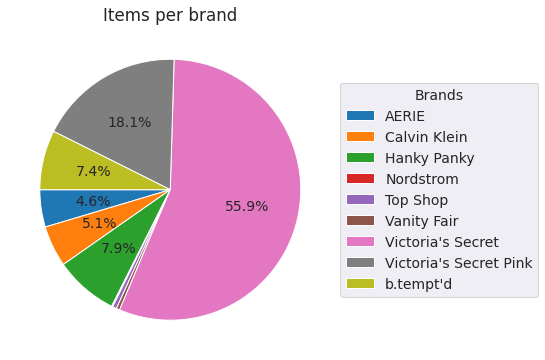

In [60]:
#This function hides labels below 4.0
def pct_brand_items(pct):
    return ('%1.1f%%' % pct) if pct > 4.0 else ''

plt.figure(figsize=(12,6))
plt.title("Items per brand")
wedges,text,autotext = plt.pie(brands_items_df, autopct=pct_brand_items, startangle=180);

plt.legend(wedges, brands_items_df.index,
          title="Brands",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

As we see, most items in our dataset belong to Victoria's Secret and Victoria's Secret Pink. Both brands have more than 60% of the total products we are studying. Also brands like Top Shop and Vanity Fair are grossly underrepresented. Brands like b.tempt'd, AERIE, Calvin Klein and Hanky Panky are almost equally represented on the dataset. 

### __Relationship Retailer/Items__


Some brands are sold on several retailers, for example Victoria's Secret lingerie is also sold on Amazon not only on their own website. It is important to know how our items are distributed between the different retailers. 

In [61]:
retailer_items_df = lingerie_df.groupby('retailer').product_name.count()

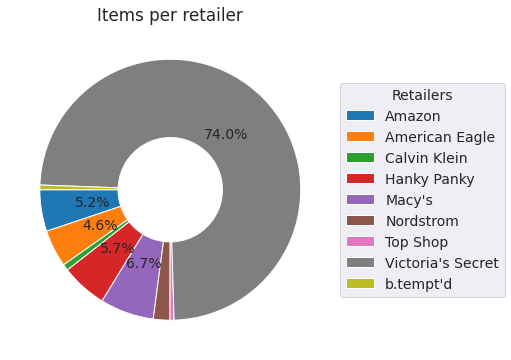

In [62]:
def pct_retailer_items(pct):
    return ('%1.1f%%' % pct) if pct > 4.0 else ''

plt.figure(figsize=(12,6))
plt.title("Items per retailer")
wedges,text,autotext = plt.pie(retailer_items_df, autopct=pct_retailer_items, wedgeprops=dict(width=0.6), startangle=180);

plt.legend(wedges, retailer_items_df.index,
          title="Retailers",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

As we can see from the graphic, more than 70% of the items are from the Victoria's Secret website. Amazon, American Eagle and Hanky Panky are almost equally represented with 4.0% to 6.7% of the items.  Nordstrom, b.tempt'd, Calvin Klein and Top Shop are underrepresented.  

### __Relationship product group category / items__


On the cleaning stage we separated products within different groups, it will be good to see how the items are distributed between each of those categories.

In [63]:
group_cat_items_df = lingerie_df.groupby('product_cat_group').product_cat_group.count()
group_cat_items_df

product_cat_group
baseball hat              27
bikini                  6306
bottle                    39
bra                   422182
collections             1578
hoodie                    93
kit                       18
leggings                  75
lingerie               40336
panty                 133856
petal                     22
shapewear               1018
socks                     80
top                     7328
washed canvas tote         9
Name: product_cat_group, dtype: int64

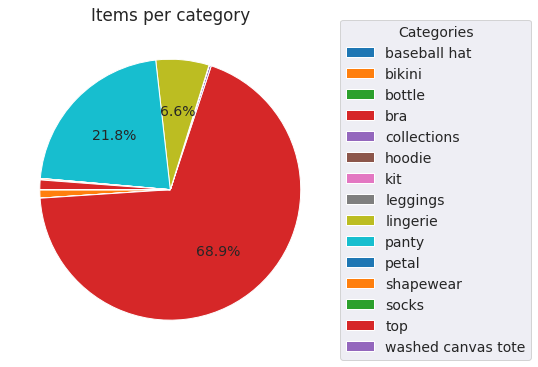

In [64]:
#This function hides labels below 4.0
def pct_cat_items(pct):
    return ('%1.1f%%' % pct) if pct > 4.0 else ''

plt.figure(figsize=(12,6))
plt.title("Items per category")
wedges,text,autotext = plt.pie(group_cat_items_df, autopct=pct_cat_items, startangle=180);

plt.legend(wedges, group_cat_items_df.index,
          title="Categories",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

As we see, most of our products are bras, panties or lingerie in general. Is important to see that most group of products are underrepresented on the dataset so we could not make assumptions on those.

### __Ratings exploration per brand__


Each item in our dataset has a rating from 1 to 5. We can get insights about the customer satisfaction by analyzing how these numbers variate from brand to brand. First, we can start by using panda's `describe()` method to get and idea of how each rating per brand is.

In [65]:
lingerie_df.groupby('brand_name').describe().rating

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
AERIE,21124.0,4.276217,0.736673,1.0,4.0,4.4,4.8,5.0
Calvin Klein,18107.0,4.335091,0.498317,0.0,4.0,4.4,4.7,5.0
Hanky Panky,16086.0,4.737747,0.434655,0.0,4.6,4.9,5.0,5.0
Nordstrom,852.0,3.542723,0.484064,2.7,3.3,3.5,4.0,5.0
Top Shop,266.0,4.245113,1.008490,1.0,4.0,4.7,5.0,5.0
Vanity Fair,2436.0,4.493637,0.384126,0.0,4.4,4.5,4.8,5.0
Victoria's Secret,105293.0,4.116166,0.475583,0.0,3.9,4.3,4.4,5.0
Victoria's Secret Pink,32505.0,4.327307,0.490506,0.0,4.2,4.5,4.5,5.0
b.tempt'd,36815.0,4.322132,0.427348,0.0,4.2,4.3,4.4,5.0


To visualize it better we can use a boxplot to get an idea of how the ratings are distributed per brand.

Overall each brand has a good rating, even though Nordstrom for example could be considered the one with the lowest rating and Hanky Panky the one with the biggest rating. The brand with the most ranking variation was Top Shop and the brand with the lowest variation was b.tempt'd.

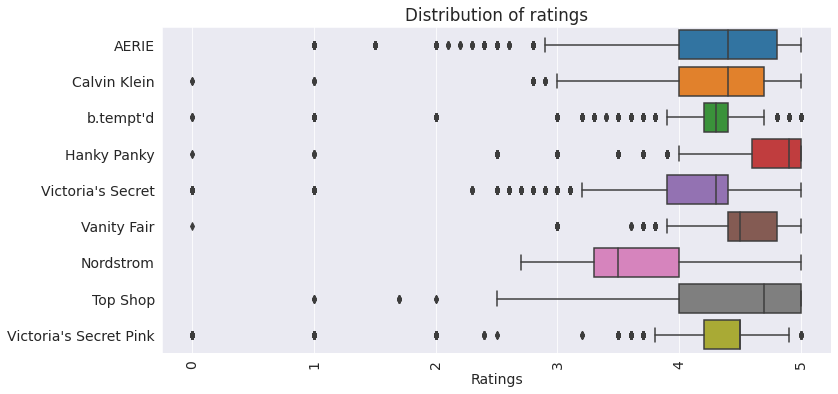

In [107]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Distribution of ratings')
ax = sns.boxplot(x= lingerie_df.rating, y= lingerie_df.brand_name);
ax.set(xlabel="Ratings", ylabel = "");

If we observe the describe table for the rating attribute that we previously plotted, we see that the standard deviations are somewhat low, that means that we can trust the mean value of the ratings to be a good metric to evaluate each brand against each other. On the next section we will do that by creating a bar plot with the mean of ratings of each brand. 

In [67]:
mean_ratings_df = lingerie_df.groupby('brand_name').rating.mean()
mean_ratings_df = mean_ratings_df.sort_values()
mean_ratings_df

brand_name
Nordstrom                 3.542723
Victoria's Secret         4.116166
Top Shop                  4.245113
AERIE                     4.276217
b.tempt'd                 4.322132
Victoria's Secret Pink    4.327307
Calvin Klein              4.335091
Vanity Fair               4.493637
Hanky Panky               4.737747
Name: rating, dtype: float64

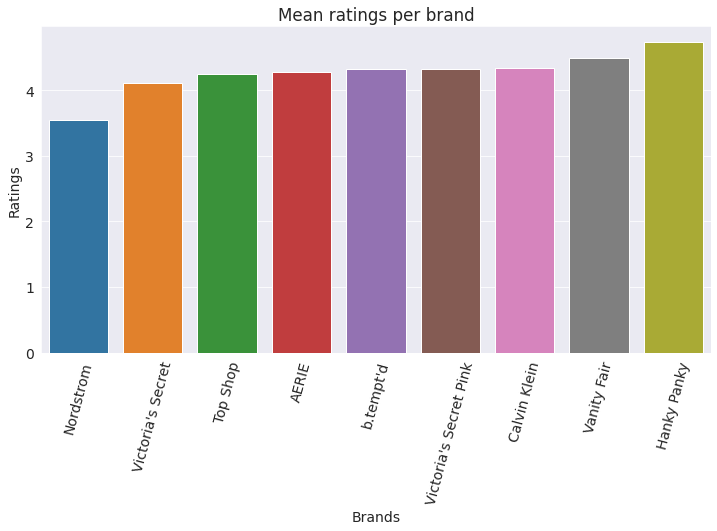

In [106]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Mean ratings per brand')
ax = sns.barplot(x= mean_ratings_df.index, y= mean_ratings_df);
ax.set(xlabel="Brands", ylabel = "Ratings");

The previous bar plot confirms what we discovered on the box plot, Hanky Panky is definitely the brand with the best ratings, followed by Vanity Fair. On the other hand, Nordstrom is the brand with the lowest ratings of all.

### __Price exploration per brand__

Now we can explore how the price distribution is between brands. First, let's start by plotting the describe table of this attribute:

In [69]:
lingerie_df.groupby('brand_name').price.describe()

,count,mean,std,min,25%,50%,75%,max
brand_name,,,,,,,,
AERIE,28303.0,16.219668,7.052951,3.99,9.50,13.47,19.77,51.09
Calvin Klein,31216.0,27.355830,14.893259,4.99,13.00,24.00,37.80,125.00
Hanky Panky,48261.0,43.090565,32.540730,10.00,24.00,34.00,54.00,615.00
Nordstrom,869.0,21.369390,14.433835,6.00,13.00,13.00,29.00,75.00
Top Shop,3076.0,23.097692,18.647059,0.00,10.00,20.00,35.00,110.00
Vanity Fair,2574.0,27.230097,13.737047,3.99,11.50,38.00,40.00,40.00
Victoria's Secret,342581.0,34.117657,16.581134,0.00,19.99,34.50,48.50,98.00
Victoria's Secret Pink,110847.0,26.697677,10.727479,0.00,16.99,32.95,34.95,64.95
b.tempt'd,45240.0,40.637795,18.351453,5.00,23.80,44.00,56.00,85.00


As we see on the table above all the prices are between `0.00$` and `615$`. The mean of product prices between brands is between `16$` and `40$` but as we see, the standard deviation of the means are high. That implies that the variance is high and the mean values of the prices are not reliable. Anyway, we can make a violin plot to see the distribution of prices:

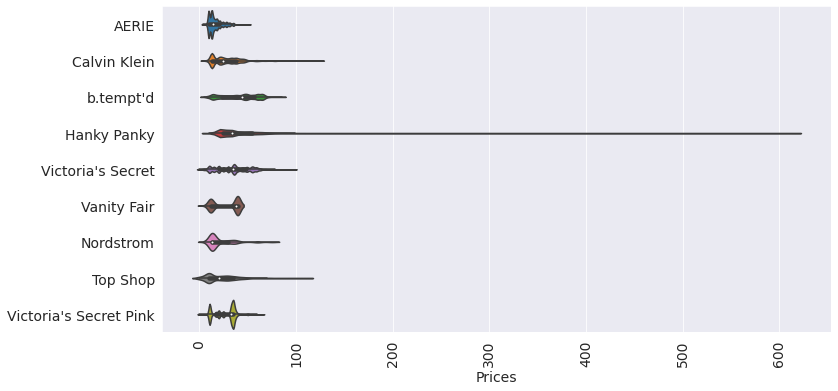

In [105]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.violinplot(x=lingerie_df.price, y=lingerie_df.brand_name);
ax.set(xlabel="Prices", ylabel = "");

The Hanky Panky prices are the ones with more variance, we can "zoom in" this result if we concentrate on the prices below `100$`(not on the extremes) to make violin plot. 

In [71]:
lingerie_prices_below_100 = lingerie_df[lingerie_df['price']<100]


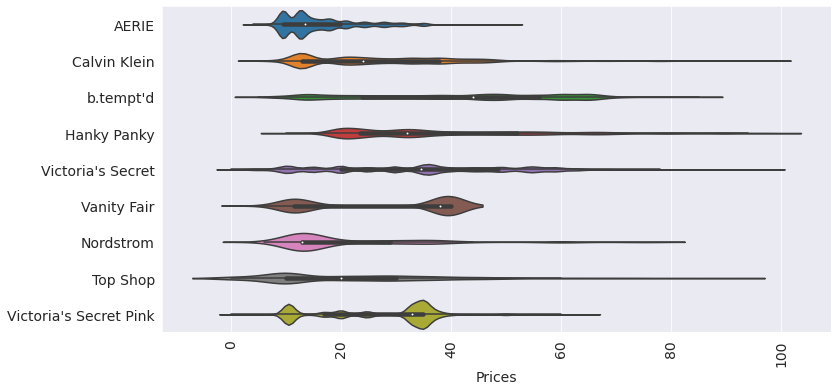

In [104]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.violinplot( x=lingerie_prices_below_100.price, y=lingerie_prices_below_100.brand_name);
ax.set(xlabel="Prices", ylabel = "");


Violin plot show us there is something weird with this data and the histograms below confirm it.  Most of the brands have two modes and really unregular distribution. 

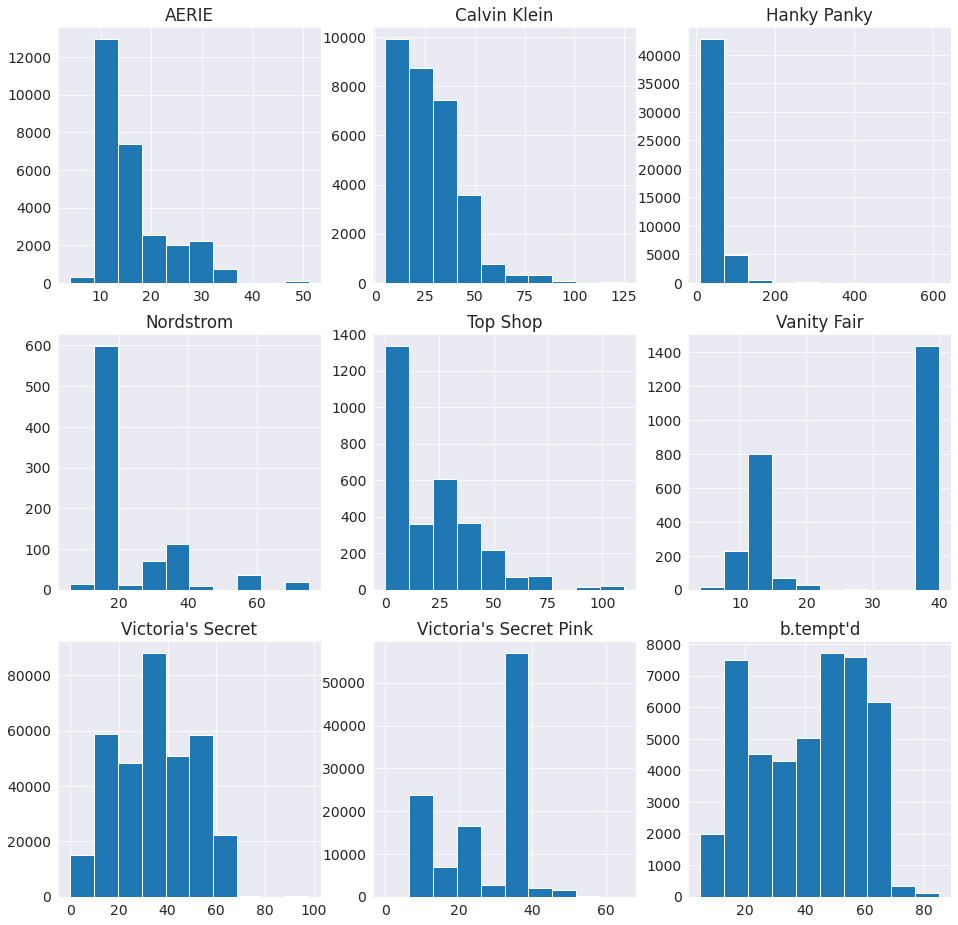

In [73]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
brand_names = ['AERIE','Calvin Klein','Hanky Panky','Nordstrom','Top Shop','Vanity Fair',"Victoria's Secret","Victoria's Secret Pink","b.tempt'd"]
counter = 0

for i in range(3):
  for j in range(3):
    axes[i,j].set_title(brand_names[counter])
    axes[i,j].hist(lingerie_df[lingerie_df.brand_name == brand_names[counter]].price);
    counter+=1



Maybe if we divide the prices into category groups, they will be more regular. I will concentrate only in the category group 'bra' on the next section


## __Asking and Answering Questions__



In this section I will answer some questions with the data that could be useful to know if you want to make a purchase. Unlike the previous analysis, I will focus only on the category group of brassiers called "bra."

In [78]:
bras = lingerie_df[lingerie_df.product_cat_group == 'bra']

###  __Question 1: Is there any relationship between the price and rating of a product?__ 

We can visualize the distribution and relationship of price and rating by plotting a scatterplot. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


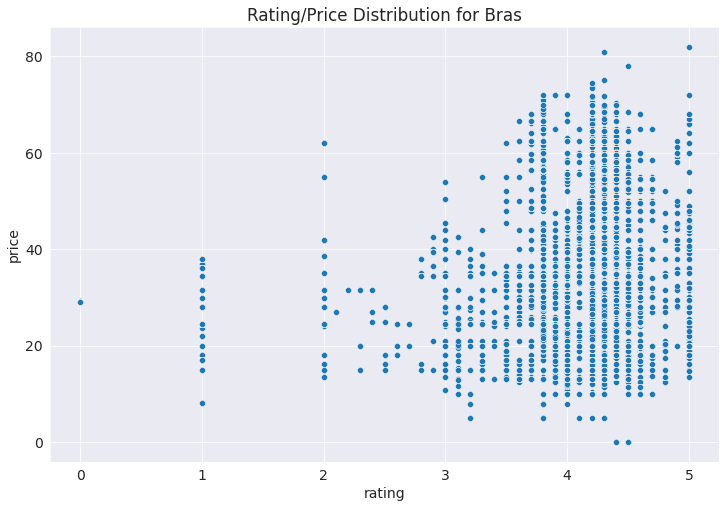

In [103]:
plt.figure(figsize=(12,8))
sns.scatterplot(bras.rating, # X-axis
                bras.price,  # Y-axis
                );

# Chart title
plt.title("Rating/Price Distribution for Bras");


This graphs shows that top rated articles tend to be expanded over the whole spectrum of prices meanwhile the lower rated once tend to not pass the $40 line. However the graph does not show an exact relationship like we would hope and certainly lots of top rated items are more expensive than lower rated items. 

### __Question 2: Is it better to buy from the brand retailer or from a general retailer?__



Some items in our dataset are sold by their brand retail page and also have others general retailers such as Macy's or Amazon. I want to know which of the two options to buy a product is the best if you want to save money. 


On the data exploration part we discovered that at least 7.4% of our items are from b.tempt'd and 5.1 % from Calvin Klein. But when we plotted the donut plot to know which was the porcentage of retailers, less than 1% belongs to the Calvin Klein and b.tempt'd store combined. That means sales in other sites are frequent and knowing if they are convenient is a good question to ask. I will try to answer this question by solving one by one smallest questions



__What are the brands and retailers that we have for bras?__



In [86]:
bras.retailer.unique()

array(['American Eagle', 'Amazon', "b.tempt'd", 'Calvin Klein',
       'Hanky Panky', "Macy's", 'Nordstrom', "Victoria's Secret"],
      dtype=object)

In [88]:
bras.brand_name.unique()

array(['AERIE', 'Calvin Klein', "b.tempt'd", "Victoria's Secret",
       'Hanky Panky', 'Vanity Fair', 'Nordstrom',
       "Victoria's Secret Pink"], dtype=object)

We have the following retailers: 'American Eagle', 'Amazon', "b.tempt'd", 'Calvin Klein','Hanky Panky', "Macy's", 'Nordstrom' and "Victoria's Secret'

We have the following brands: 'AERIE', "b.tempt'd", 'Hanky Panky', 'Calvin Klein', 'Vanity Fair','Nordstrom', "Victoria's Secret", "Victoria's Secret Pink"


__Which brands have different retailers?__

We can get that information by querying every unique retailer for each brand name 

In [94]:
bras[bras.brand_name == 'AERIE' ].retailer.unique()

array(['American Eagle'], dtype=object)

In [95]:
bras[bras.brand_name == "b.tempt'd"].retailer.unique()

array(['Amazon', "b.tempt'd", "Macy's", 'Nordstrom'], dtype=object)

In [96]:
bras[bras.brand_name == 'Hanky Panky'].retailer.unique()

array(['Hanky Panky', "Macy's", 'Nordstrom'], dtype=object)

In [97]:
bras[bras.brand_name == 'Calvin Klein'].retailer.unique()

array(['Amazon', 'Calvin Klein', "Macy's", 'Nordstrom'], dtype=object)

In [98]:
bras[bras.brand_name == 'Vanity Fair'].retailer.unique()

array(["Macy's"], dtype=object)

In [101]:
bras[bras.brand_name == 'Nordstrom'].retailer.unique()

array(['Nordstrom'], dtype=object)

In [100]:
bras[bras.brand_name == "Victoria's Secret"].retailer.unique()

array(['Amazon', "Victoria's Secret"], dtype=object)

In [99]:
bras[bras.brand_name == "Victoria's Secret Pink"].retailer.unique()

array(["Victoria's Secret"], dtype=object)

As we see: 

- Victoria's Secret is sold both in Victoria's Secret web page and in Amazon
- Calvin Klein is sold on Amazon, the Calvin Klein's website, Macy's and Nordstrom
- Hanky Panky is sold on the Hanky Panky website, Macy's and Nordstrom
- b.tempt'd is sold on the b.tempt'd website, Amazon, Macy's and Nordstrom

__What is the cheapest retailer to buy Victoria's Secret bras from?__

For this we need to create a separate dataframes with only the Victoria's Secret bras. Then we will try to see the distribution of the prices between the retailers by plotting helpful visualizations.

In [114]:
victorias_secret_bras = bras[bras.brand_name == "Victoria's Secret"]

In [115]:
victorias_secret_bras.groupby('retailer').price.describe()

,count,mean,std,min,25%,50%,75%,max
retailer,,,,,,,,
Amazon,67.0,40.402537,5.739555,29.99,36.765,39.99,39.99,55.0
Victoria's Secret,283352.0,37.480230,14.720888,0.00,24.990,36.50,49.50,69.5


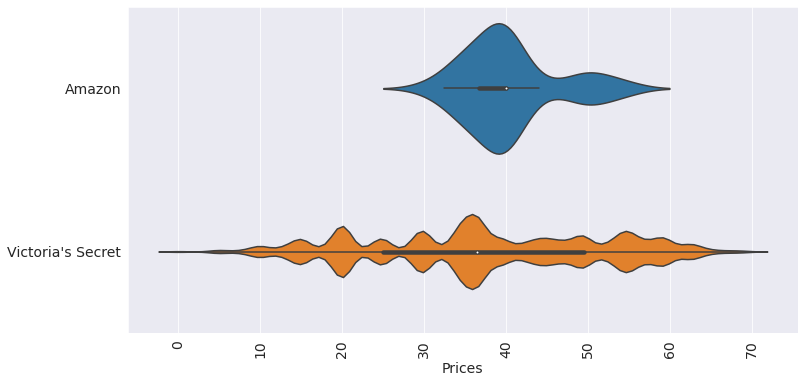

In [124]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.violinplot( x=victorias_secret_bras.price, y=victorias_secret_bras.retailer);
ax.set(xlabel="Prices", ylabel = "");


This graphic and the table shows that even though the Victoria's Secret website has the max price on this subset (`70$`) it is more consistent on having the price range accross the spectrum of prices, meanwhile the amazon website tends to have most of the items at the same price. So in this particular case, I would choose to buy from the Victoria's Secret website as it is more possible that you get a cheapest price and not `$35` - `$40` as default

__What is the cheapest retailer to buy Calvin Klein bras from?__

As we did with the last case, we will isolate all the bras that belong to the brand Calvin Klein.

In [119]:
calvin_klein_bras = bras[bras.brand_name == "Calvin Klein"]

In [120]:
calvin_klein_bras.groupby('retailer').price.describe()

,count,mean,std,min,25%,50%,75%,max
retailer,,,,,,,,
Amazon,4465.0,35.981541,7.006706,9.99,32.00,37.8,41.4,60.6
Calvin Klein,1398.0,29.747003,9.060989,14.99,24.00,28.0,38.0,58.0
Macy's,3445.0,35.732311,13.230629,14.70,24.99,34.0,44.0,78.0
Nordstrom,783.0,33.703448,13.194743,16.80,25.20,32.0,38.0,78.0


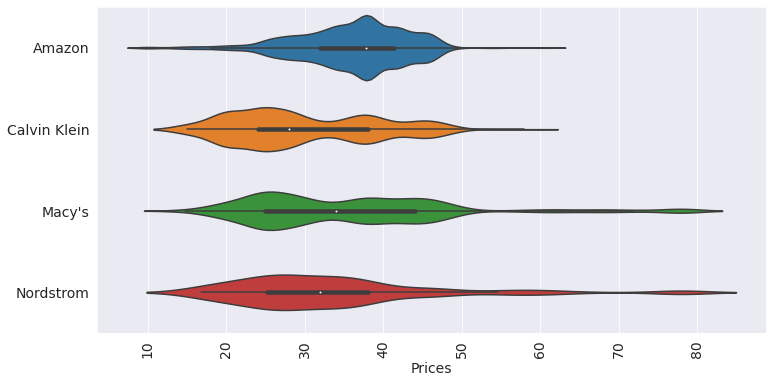

In [125]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.violinplot( x=calvin_klein_bras.price, y=calvin_klein_bras.retailer);
ax.set(xlabel="Prices", ylabel = "");

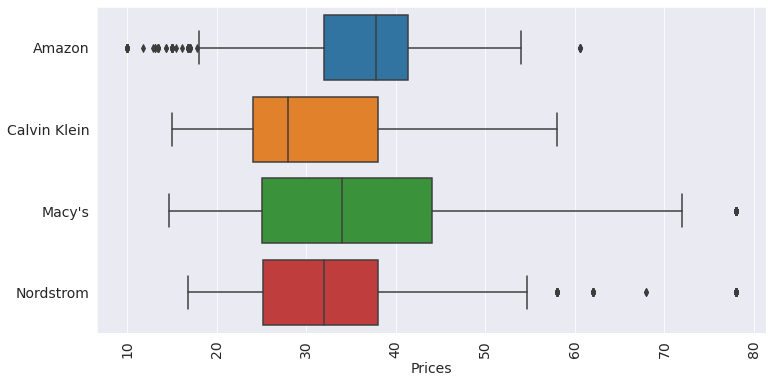

In [126]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.boxplot( x=calvin_klein_bras.price, y=calvin_klein_bras.retailer);
ax.set(xlabel="Prices", ylabel = "");

In this case, it appears that the Calvin Klein website is the cheapest retailer for Calvin Klein bras, followed closely by Nordstrom. This is because not only the mean is lower than the rest but because also in the violin plot can be see that the majority of the products are within the `20$` - `30$` range  

__What is the cheapest retailer to buy Hanky Panky bras from?__

We will follow the same procedure as with the two cases before this one

In [127]:
hanky_panky_bras = bras[bras.brand_name == "Hanky Panky"]

In [128]:
hanky_panky_bras.groupby('retailer').price.describe()

,count,mean,std,min,25%,50%,75%,max
retailer,,,,,,,,
Hanky Panky,6273.0,56.580049,13.308027,15.0,50.0,56.0,66.0,186.0
Macy's,767.0,48.320222,11.995413,19.5,46.0,52.0,56.0,72.0
Nordstrom,465.0,54.720860,12.155424,25.2,50.0,57.0,65.0,74.0


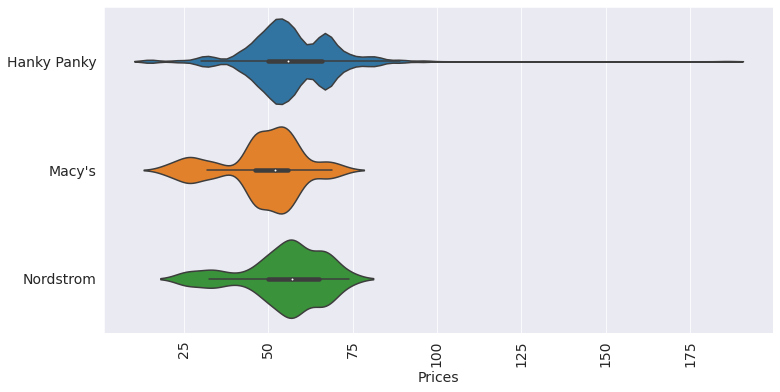

In [129]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.violinplot( x=hanky_panky_bras.price, y=hanky_panky_bras.retailer);
ax.set(xlabel="Prices", ylabel = "");

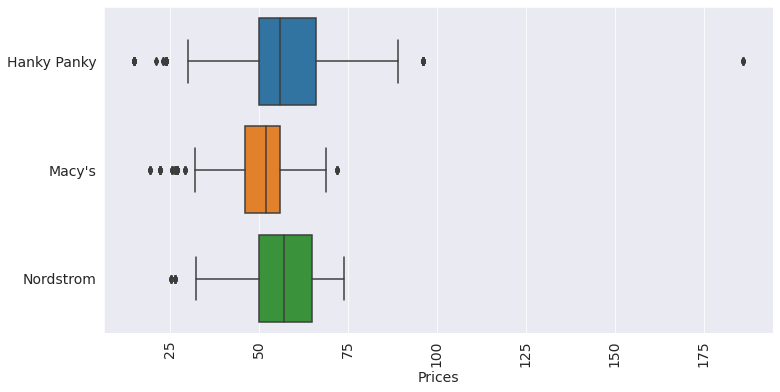

In [130]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.boxplot( x=hanky_panky_bras.price, y=hanky_panky_bras.retailer);
ax.set(xlabel="Prices", ylabel = "");

Unlike the other cases, this is the first time it is better to buy from a general retailer (Macy's) than to buy directly from the brand website itself. 
On the boxplot we can see that is not only the mean of the prices that is below but also the items are more compacted towards that mean and there's less variance of prices for Macy's compared to the other two options. 

__What is the cheapest retailer to buy b.tempt'd bras from?__

Same procedure as before

In [131]:
btempdtd_bras = bras[bras.brand_name == "b.tempt'd"]

In [132]:
btempdtd_bras.groupby('retailer').price.describe()

,count,mean,std,min,25%,50%,75%,max
retailer,,,,,,,,
Amazon,22307.0,50.208220,12.981542,5.00,44.0,50.0,60.0,80.99
Macy's,3575.0,43.468568,14.981292,15.75,30.0,44.0,56.0,72.00
Nordstrom,1317.0,51.605923,13.671695,18.00,38.0,55.0,64.0,82.00
b.tempt'd,1298.0,28.620339,9.688332,10.80,22.4,26.4,38.0,46.00


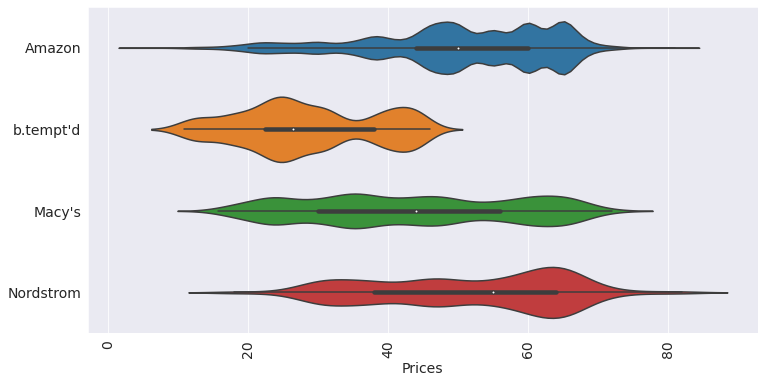

In [133]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.violinplot( x=btempdtd_bras.price, y=btempdtd_bras.retailer);
ax.set(xlabel="Prices", ylabel = "");

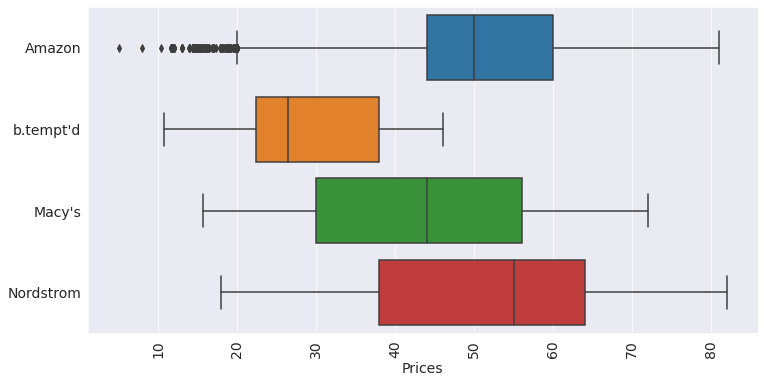

In [134]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.boxplot( x=btempdtd_bras.price, y=btempdtd_bras.retailer);
ax.set(xlabel="Prices", ylabel = "");

In this case b.tempt'd has the cheapest prices accross the different retailers. In conclusion, in most cases it is better to buy from the brand retailer than to buy from a general retailer to get the best prices.

### __Question 3: Which retailer gives the most discount on bras?__

We can measure the discount percentage of an item as the difference between mrp (maximum retailer price) and the actual price of sale. Using this term we can classify the discount that each brand gives per item and learn which brand is giving the most discount. 

In [143]:
#make the discount calculation
bras['discount'] =((bras.mrp - bras.price) * 100) / bras.mrp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
bras.discount.describe()

count    421894.000000
mean         11.692705
std          20.523957
min           0.000000
25%           0.000000
50%           0.000000
75%          25.000000
max          92.307692
Name: discount, dtype: float64

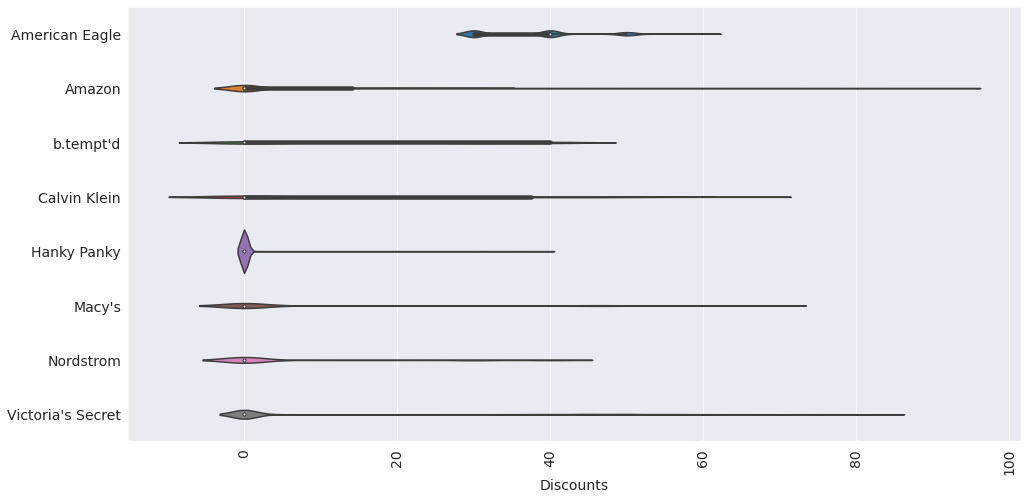

In [149]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90)
ax = sns.violinplot( x=bras.discount, y=bras.retailer);
ax.set(xlabel="Discounts", ylabel = "");

Apparently, all the retailer seem to not give discounts on bras in general. However, American Eagle seem to have a small proportion of discounts between the range `20$` - `40$` so I am inclined to choose that retailer as the one that give most discounts on bras. 

### __Question 4: Which retailer has the lowest prices for bras?__

This is a straighfoward question that can be answered with a simple boxplot

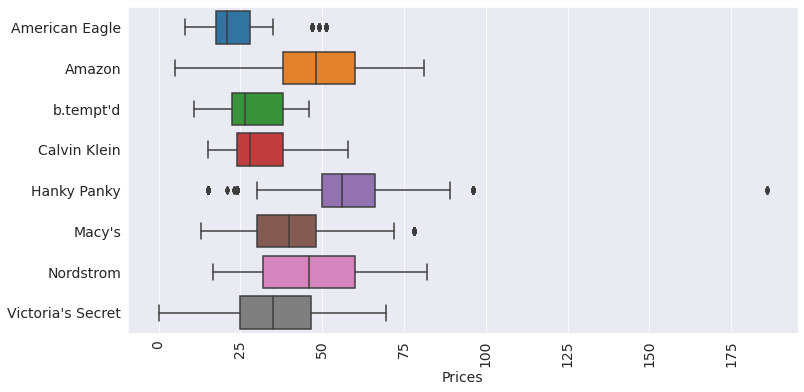

In [152]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.boxplot(x=bras.price, y=bras.retailer);
ax.set(xlabel="Prices", ylabel = "");

The boxplot show that the lowest prices of bras can be found on the American Eagle website, this make sense as in the question before we established that retailer also had the highest discounts

### __Question 5: Which is the cheapest retailer option for buying a top rated bra?__

I will define a top rated bra as one having a rating higher than `4.0`. So first I create a dataframe with only these bras

In [153]:
top_rated_bras = bras[bras.rating > 4.0]

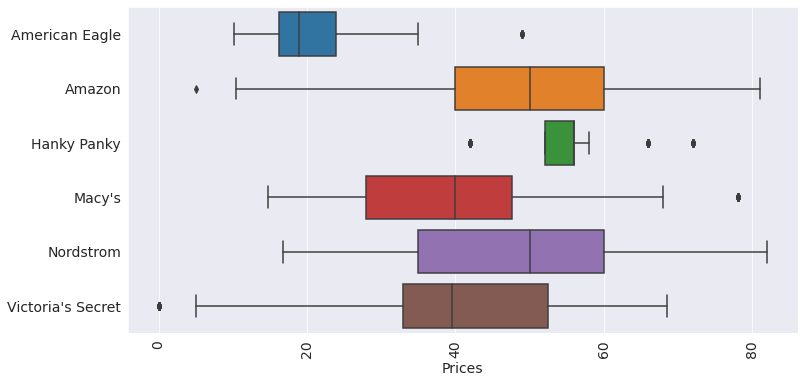

In [154]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
ax = sns.boxplot(x=top_rated_bras.price, y=top_rated_bras.retailer);
ax.set(xlabel="Prices", ylabel = "");

Once again, American Eagle wins as the retailer with better deals for top rated bras.  The second place is for Macy's and the third for Victoria's Secret

## __Inferences and Conclusion__

- American Eagle is the best retailer to buy from as it has the cheapest top rated bras, the most discount and it is the cheapest retailer.

- In general, it is cheaper to buy straight from the brand website than to go to any general retailer for brands that allow that option (Victoria's Secret, Hanky Panky, etc)

- There's no relationship between prices and ratings of products.

- Hanky Panky is the brand with the highest rating of all and Nordstrom the one with the lowest.


## __Future work__

- It would be interesting to analyze lingerie by color
- It would be amazing to do cloud words of similar words with the description of the lingerie
- Distinguish if the product is selling as a pack of lingerie or a singleton
- This analysis was very general, it would be cool to separate each category/brand and see how it works
- Consider other category groups would be wonderful

## References 

__Dataset:__

[Innerwear Data from Victoria's Secret and Others](https://www.kaggle.com/PromptCloudHQ/innerwear-data-from-victorias-secret-and-others)

__Other References:__


[EDA for Lingerie](https://www.kaggle.com/justinekays/eda-for-lingerie)

[Download large files using python](https://www.kite.com/python/answers/how-to-download-large-files-with-requests-in-python)

[Chartopedia](https://www.anychart.com/chartopedia/chart-type/)

[The Python Graph Gallery](https://python-graph-gallery.com/)

[Matplotlib Pies](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html)

[Seaborn Examples](https://seaborn.pydata.org/examples)


[Data Driven Lingerie Shopping](https://www.kaggle.com/jkokatjuhha/data-driven-lingerie-shopping)